## Final Project Submission

Please fill out:
* Student name: Christopher Woo
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# import all necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import itertools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
%matplotlib inline

Using TensorFlow backend.


In [2]:
## load data into dataframe

df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
## checking to see what needs to be preprocessed in data
## checking for any null values
df.isnull().any()

state                     False
account length            False
area code                 False
phone number              False
international plan        False
voice mail plan           False
number vmail messages     False
total day minutes         False
total day calls           False
total day charge          False
total eve minutes         False
total eve calls           False
total eve charge          False
total night minutes       False
total night calls         False
total night charge        False
total intl minutes        False
total intl calls          False
total intl charge         False
customer service calls    False
churn                     False
dtype: bool

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

In [5]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [6]:
## get rid of unnecessary columns
## I'm going to get rid of state, area code, phone number, and number vmail messages
## Getting rid of number vmail messages because over half the values are at 0 and the voicemail plan column accounts for vmail in the data

X = df.drop(labels=['state', 'area code', 'phone number', 'number vmail messages', 'churn'], axis=1)
y = df['churn'].astype(int)

In [7]:
## convert categorical variables international plan and voicemail plan to 0s and 1s
X['international plan'] = (X['international plan'] == 'yes').astype(int)
X['voice mail plan'] = (X['voice mail plan'] == 'yes').astype(int)

In [8]:
## check values to make sure they were converted correctly
X.head()

,account length,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,0,1,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,0,1,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,1,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,1,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [9]:
## checking customer churn percentage
y.value_counts(normalize=True)

0    0.855086
1    0.144914
Name: churn, dtype: float64

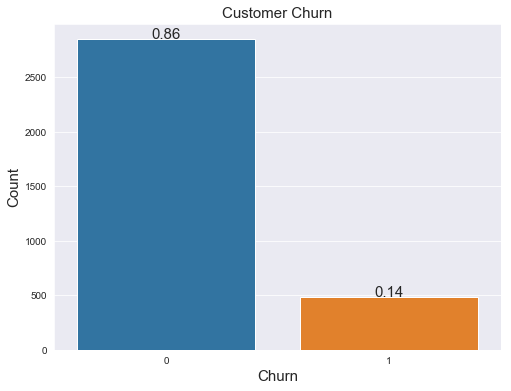

In [10]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(y)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/len(y)),
            ha="center",
            fontsize=15) 
plt.title('Customer Churn', fontsize=15)
plt.xlabel('Churn', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

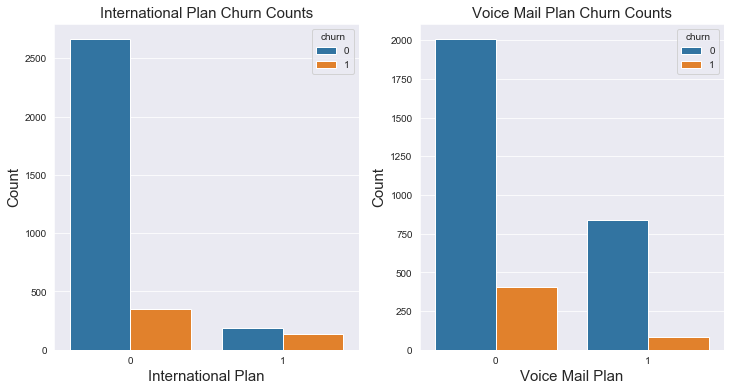

In [11]:
## Graphs to see how the categorical variables relate to churn

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(X['international plan'], hue=y)
plt.title('International Plan Churn Counts', fontsize=15)
plt.xlabel('International Plan', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.subplot(1, 2, 2)
sns.countplot(X['voice mail plan'], hue=y)
plt.title('Voice Mail Plan Churn Counts', fontsize=15)
plt.xlabel('Voice Mail Plan', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

Seems like having an international plan has a high chance of customer churn while having a voice mail plan has a low chance of customer churn.

In [12]:
## split data into training and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
## start running data through different models starting with Logistic Regression
## using SMOTE to deal with class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)

In [82]:
## Build pipeline for logistic regression model and scale data

logistic_pipeline = Pipeline([('ss', StandardScaler()),
                              ('LR', LogisticRegression(solver='liblinear', fit_intercept=False, random_state=42))])

In [83]:
## create grid parameter for logistic regression

logistic_grid = [{'LR__C': [1, 50, 2000, 1e15],
                  'LR__penalty': ['l1', 'l2']}]

logistic_gridsearch = GridSearchCV(estimator=logistic_pipeline,
                                   param_grid=logistic_grid,
                                   scoring='accuracy',
                                   cv=5)

In [96]:
logistic_gridsearch.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 50, 2000, 1000000000000000.0], 'penalty': ['l1', 'l2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [105]:
logistic_gridsearch.score(X_test, y_test)

0.7865707434052758

In [98]:
logistic_gridsearch.best_params_

{'C': 1, 'penalty': 'l1'}

Best parameters for logistic regression is a C value of 2000 and using Ridge regression.

In [19]:
## calculate evaluation metrics for model: precision, recall, accuracy, f1

y_hat_train = logistic_gridsearch.predict(X_train_resampled)
y_hat_test = logistic_gridsearch.predict(X_test)

print('Training Precision: ', precision_score(y_train_resampled, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('')

print('Training Recall: ', recall_score(y_train_resampled, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('')

print('Training Accuracy: ', accuracy_score(y_train_resampled, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('')

print('Training F1-Score: ', f1_score(y_train_resampled, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.7857815442561206
Testing Precision:  0.4

Training Recall:  0.779542269967305
Testing Recall:  0.784

Training Accuracy:  0.7835123773937412
Testing Accuracy:  0.7913669064748201

Training F1-Score:  0.7826494724501758
Testing F1-Score:  0.5297297297297298


Recall and accuracy scores are pretty good with scores of around 77-78%. However precision score is extremely low at 40% leading to a low F1 score of around 50%. Testing precision is much lower than training precision showing signs of overfitting for the training data.

For this problem, I believe recall to be more important than precision because it is better for SyriaTel to have more false positives than false negatives. False positives are customers that the model predicts will leave but do not and false negatives are customers that the model predicts will not leave but do. It's best to minimize false negatives so that the company does not fail to detect customers that are probably leaving.

However, precision and F1 score still remain low so we will examine more models to see if they perform better than logistic regression.

[[562 147]
 [ 27  98]]


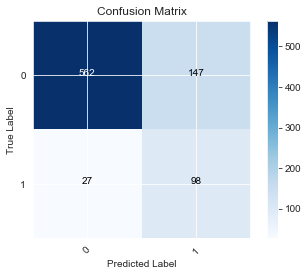

In [20]:
## create confusion matrix

logistic_cnf_matrix = confusion_matrix(y_test, y_hat_test)

print(logistic_cnf_matrix)
plt.imshow(logistic_cnf_matrix, cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = logistic_cnf_matrix.max()/2.

for i, j in itertools.product(range(logistic_cnf_matrix.shape[0]), range(logistic_cnf_matrix.shape[1])):
    plt.text(j, i, logistic_cnf_matrix[i, j],
             horizontalalignment='center',
             color='white' if logistic_cnf_matrix[i, j] > thresh else 'black')

plt.colorbar()
plt.show()

AUC: 0.8340084626234133


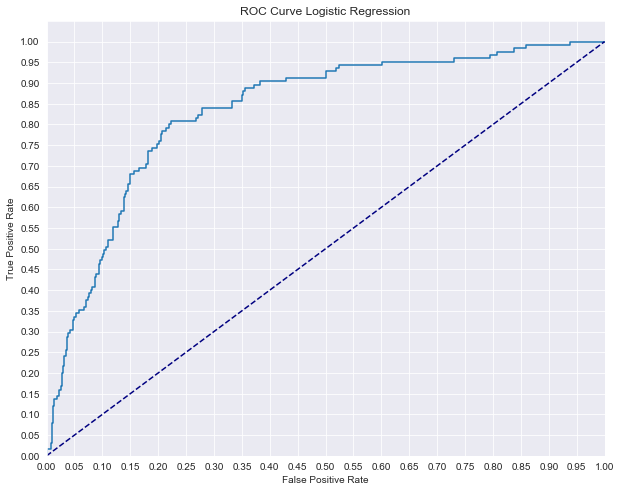

In [21]:
## calculate ROC curve and AUC

y_score = logistic_gridsearch.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

print(f'AUC: {auc(fpr, tpr)}')

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Logistic Regression')
plt.show()

The AUC score of 83% means the model is performing pretty well. For this problem a high false positive rate is not too harmful because those customers would not be leaving, however, SyriaTel could waste time and resources trying to keep those customers when those resources could be spent trying to retain customers that are likely to churn.

In [22]:
## run data through random forest classifier

random_forest_pipeline = Pipeline([('ss', StandardScaler()),
                                   ('RF', RandomForestClassifier(random_state=42))])

In [23]:
## checking score for random forest without hyperparameter tuning
random_forest_pipeline.fit(X_train, y_train)
random_forest_pipeline.score(X_test, y_test)

0.934052757793765

In [24]:
## create grid parameter for random forest

rf_grid = [{'RF__criterion': ['gini', 'entropy'],
            'RF__n_estimators': [10, 30, 100],
            'RF__max_depth': [None, 2, 5, 9, 15],
            'RF__max_features': [None, 'auto'],
            'RF__min_samples_split': [2, 5, 10],
            'RF__min_samples_leaf': [1, 4, 9]}]

rf_gridsearch = GridSearchCV(estimator=random_forest_pipeline, 
                             param_grid=rf_grid,
                             scoring='accuracy',
                             cv=5)

In [102]:
rf_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['gini', 'entropy'], 'n_estimators': [10, 30, 100], 'max_depth': [None, 2, 5, 9, 15], 'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 4, 9]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [103]:
rf_gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [104]:
## score increased by 1.5% tuning hyperparameters

rf_gridsearch.score(X_test, y_test)

0.9496402877697842

In [28]:
## calculate evaluation metrics for model: precision, recall, accuracy, f1

y_hat_train = rf_gridsearch.predict(X_train)
y_hat_test = rf_gridsearch.predict(X_test)

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  1.0
Testing Precision:  0.9662921348314607

Training Recall:  0.8491620111731844
Testing Recall:  0.688

Training Accuracy:  0.978391356542617
Testing Accuracy:  0.9496402877697842

Training F1-Score:  0.918429003021148
Testing F1-Score:  0.8037383177570094


The random forest model performs extremely well with an accuracy score of 95%. Precision score is really high at 97% however a recall score of 69% is lower than the logistic model. The training and testing recall scores being far apart suggest some overfitting to the training data. However, overall the model performs extremely well, much better than the logistic regression model.

[[706   3]
 [ 39  86]]


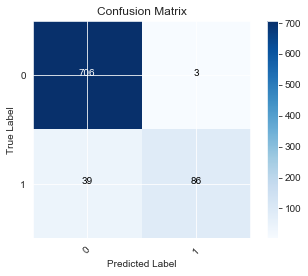

In [29]:
## create confusion matrix

rf_cnf_matrix = confusion_matrix(y_test, y_hat_test)

print(rf_cnf_matrix)
plt.imshow(rf_cnf_matrix, cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = rf_cnf_matrix.max()/2.

for i, j in itertools.product(range(rf_cnf_matrix.shape[0]), range(rf_cnf_matrix.shape[1])):
    plt.text(j, i, rf_cnf_matrix[i, j],
             horizontalalignment='center',
             color='white' if rf_cnf_matrix[i, j] > thresh else 'black')

plt.colorbar()
plt.show()

In [30]:
## define a function to plot imporant features

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [31]:
## create a RandomForest Classifier with optimal values to plot important features

optimal_rf = RandomForestClassifier(criterion='gini', 
                                    max_depth=None, 
                                    max_features='auto', 
                                    min_samples_leaf=1,
                                    min_samples_split=5,
                                    n_estimators=100,
                                    random_state=42)

optimal_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [32]:
## define a function to plot imporant features

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

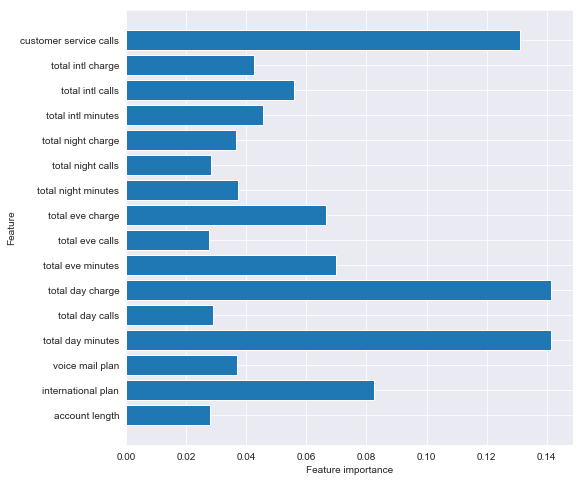

In [33]:
plot_feature_importances(optimal_rf)

Customer service calls, total day charge, and total day minutes are the most important features in determining whether or not a customer will churn.

In [34]:
## run random forest classifier with optimized hyperparameters and SMOTE to see if scores increase
ss = StandardScaler()
scaled_train = ss.fit_transform(X_train_resampled)
scaled_test = ss.transform(X_test)

optimal_rf.fit(scaled_train, y_train_resampled)
optimal_rf.score(scaled_test, y_test)

0.9424460431654677

In [35]:
## calculate evaluation metrics for model with optimized hyperparameters and SMOTE

y_hat_test = optimal_rf.predict(scaled_test)

print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('')

print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('')

print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('')

print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Testing Precision:  0.8290598290598291

Testing Recall:  0.776

Testing Accuracy:  0.9424460431654677

Testing F1-Score:  0.8016528925619835


Running the optimized random forest classifier using SMOTE the precision score decreased by around 15% while recall score increased by around 10%. Accuracy and F1 score remained similar to using data without SMOTE. If recall is more important than precision for this problem, using SMOTE is preferred for the random forest classifier

[[689  20]
 [ 28  97]]


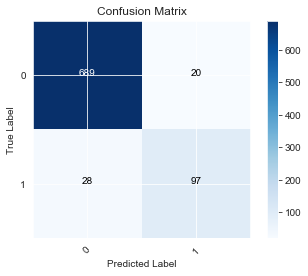

In [36]:
## create confusion matrix for random forest with SMOTE

rf_cnf_matrix = confusion_matrix(y_test, y_hat_test)

print(rf_cnf_matrix)
plt.imshow(rf_cnf_matrix, cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = rf_cnf_matrix.max()/2.

for i, j in itertools.product(range(rf_cnf_matrix.shape[0]), range(rf_cnf_matrix.shape[1])):
    plt.text(j, i, rf_cnf_matrix[i, j],
             horizontalalignment='center',
             color='white' if rf_cnf_matrix[i, j] > thresh else 'black')

plt.colorbar()
plt.show()

The random forest confusion matrix with SMOTE also shows that the model was able to predict more true positives than the model without SMOTE.

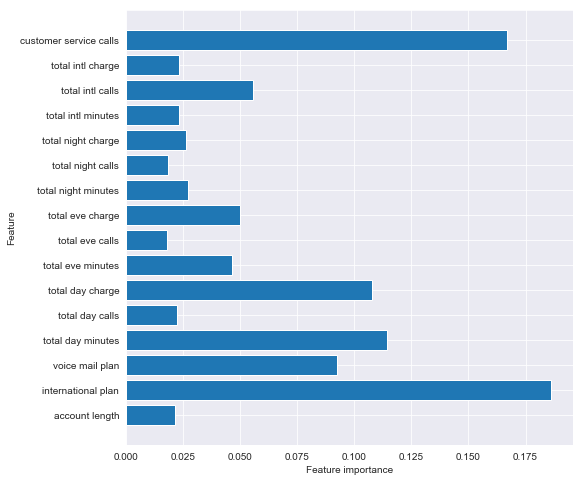

In [37]:
plot_feature_importances(optimal_rf)

The most important features for random forest using SMOTE are international plan and customer service calls.

In [38]:
## run data through xgboost

xgboost_pipeline = Pipeline([('ss', StandardScaler()),
                             ('XG', xgb.XGBClassifier(random_state=42))])

In [39]:
## create grid parameters for xgboost

xg_grid = [{'XG__learning_rate': [0.01, 0.1],
            'XG__max_depth': [3, 6, 9],
            'XG__min_child_weight': [5, 10, 20],
            'XG__subsample': [0.3, 0.7],
            'XG__n_estimators': [5, 30, 100, 250]}]

xg_gridsearch = GridSearchCV(estimator=xgboost_pipeline, 
                             param_grid=xg_grid,
                             scoring='accuracy',
                             cv=5)

In [40]:
xg_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('XG', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, m...te=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'XG__learning_rate': [0.01, 0.1], 'XG__max_depth': [3, 6, 9], 'XG__min_child_weight': [5, 10, 20], 'XG__subsample': [0.3, 0.7], 'XG__n_estimators': [5, 30, 100, 250]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [41]:
xg_gridsearch.best_params_

{'XG__learning_rate': 0.01,
 'XG__max_depth': 6,
 'XG__min_child_weight': 5,
 'XG__n_estimators': 250,
 'XG__subsample': 0.7}

In [42]:
## calculate evaluation metrics for model: precision, recall, accuracy, f1

y_hat_train = xg_gridsearch.predict(X_train)
y_hat_test = xg_gridsearch.predict(X_test)

print('Training Precision: ', precision_score(y_train, y_hat_train))
print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('')

print('Training Recall: ', recall_score(y_train, y_hat_train))
print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('')

print('Training Accuracy: ', accuracy_score(y_train, y_hat_train))
print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('')

print('Training F1-Score: ', f1_score(y_train, y_hat_train))
print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Training Precision:  0.9611307420494699
Testing Precision:  0.9368421052631579

Training Recall:  0.7597765363128491
Testing Recall:  0.712

Training Accuracy:  0.9611844737895158
Testing Accuracy:  0.9496402877697842

Training F1-Score:  0.8486739469578783
Testing F1-Score:  0.8090909090909091


The XGBoost model seems to perform the best out of all 3 models. Precision and accuracy scores are both extremely high at around 94%. Recall score for this model is lower than the logistic regression model but not by much and this model does not have the overfitting problem that the random forest classifier had. This model also boasts the highest F1 score of 81%

[[703   6]
 [ 36  89]]


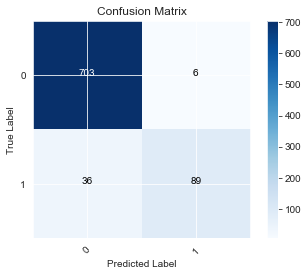

In [43]:
## create confusion matrix

xg_cnf_matrix = confusion_matrix(y_test, y_hat_test)

print(xg_cnf_matrix)
plt.imshow(xg_cnf_matrix, cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = xg_cnf_matrix.max()/2.

for i, j in itertools.product(range(xg_cnf_matrix.shape[0]), range(xg_cnf_matrix.shape[1])):
    plt.text(j, i, xg_cnf_matrix[i, j],
             horizontalalignment='center',
             color='white' if xg_cnf_matrix[i, j] > thresh else 'black')

plt.colorbar()
plt.show()

In [44]:
## create xgb classifier with optimized hyperparameters

optimal_xgb = xgb.XGBClassifier(learning_rate=0.01, 
                                max_depth=6, 
                                min_child_weight=5,
                                n_estimators=250,
                                subsample=0.7,
                                random_state=42)

optimal_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=6, min_child_weight=5, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7)

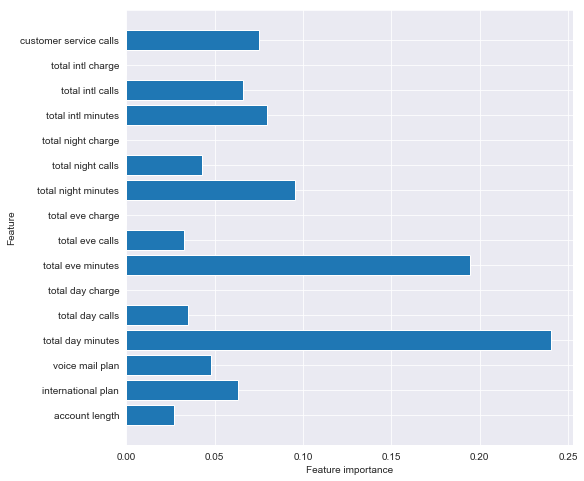

In [45]:
## plot most important features for optimized xgb classifier

plot_feature_importances(optimal_xgb)

Most important features for this classifier are total day minutes and total eve minutes

In [46]:
## use optimized xgboost classifier with SMOTE

optimal_xgb.fit(scaled_train, y_train_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=6, min_child_weight=5, missing=None, n_estimators=250,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.7)

In [47]:
## calculate evaluation metrics for model with optimized hyperparameters and SMOTE

y_hat_test = optimal_xgb.predict(scaled_test)

print('Testing Precision: ', precision_score(y_test, y_hat_test))
print('')

print('Testing Recall: ', recall_score(y_test, y_hat_test))
print('')

print('Testing Accuracy: ', accuracy_score(y_test, y_hat_test))
print('')

print('Testing F1-Score: ', f1_score(y_test, y_hat_test))

Testing Precision:  0.8166666666666667

Testing Recall:  0.784

Testing Accuracy:  0.9412470023980816

Testing F1-Score:  0.7999999999999999


[[687  22]
 [ 27  98]]


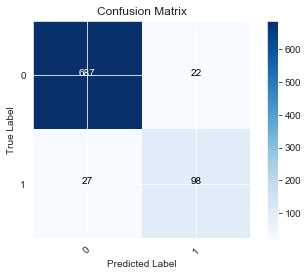

In [48]:
## create confusion matrix for xgb with SMOTE

xgb_cnf_matrix = confusion_matrix(y_test, y_hat_test)

print(xgb_cnf_matrix)
plt.imshow(xgb_cnf_matrix, cmap=plt.cm.Blues)

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = xgb_cnf_matrix.max()/2.

for i, j in itertools.product(range(xgb_cnf_matrix.shape[0]), range(xgb_cnf_matrix.shape[1])):
    plt.text(j, i, xgb_cnf_matrix[i, j],
             horizontalalignment='center',
             color='white' if xgb_cnf_matrix[i, j] > thresh else 'black')

plt.colorbar()
plt.show()

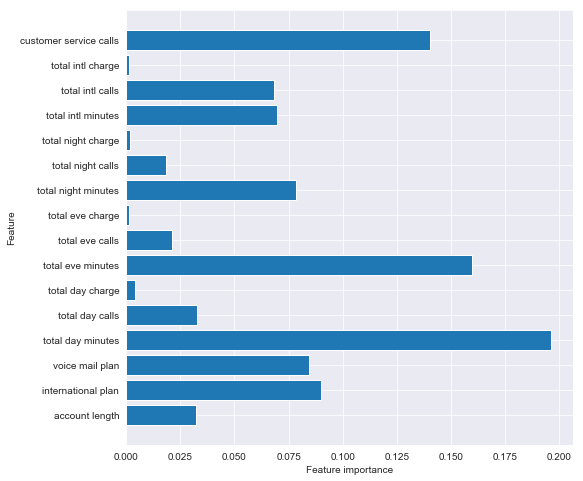

In [49]:
plot_feature_importances(optimal_xgb)

Most important features for XGBoost with SMOTE stayed the same as without SMOTE, however customer service calls has more weight with SMOTE.

Just like for random forest, using SMOTE decreases precision while increasing recall. Precision decreases by about 11-12% while recall increases around 7%. Accuracy and F1 scores remain relatively the same.

If precision is favored over recall using the model without SMOTE is best, however if recall is favored, using SMOTE is best.

After running the data through Logistic Regression, Random Forest, and XGBoost and tuning the hyperparameters, the XGBoost Classifier yielded the best results. While the other two models showed signs of overfitting to the training data, the XGBoost Classifier seemed to fit the training and testing data Because recall is more important to this problem than precision, we will use SMOTE on our data because it increased our recall score when compared to using our data without SMOTE.

With a precision score of 82%, recall score of 78%, accuracy score of 94%, and F1 score of 80%, I am very confident in this model to predicut customer churn.

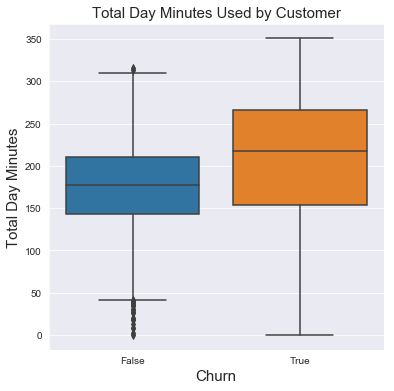

In [50]:
## plotting most important features grouped by churn

plt.figure(figsize=(6, 6))
sns.boxplot(x='churn', y='total day minutes', data=df, orient='v')
plt.title('Total Day Minutes Used by Customer', fontsize=15)
plt.ylabel('Total Day Minutes', fontsize=15)
plt.xlabel('Churn', fontsize=15)
plt.show()

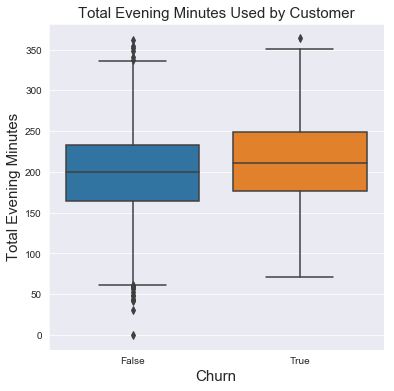

In [51]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='churn', y='total eve minutes', data=df, orient='v')
plt.title('Total Evening Minutes Used by Customer', fontsize=15)
plt.ylabel('Total Evening Minutes', fontsize=15)
plt.xlabel('Churn', fontsize=15)
plt.show()

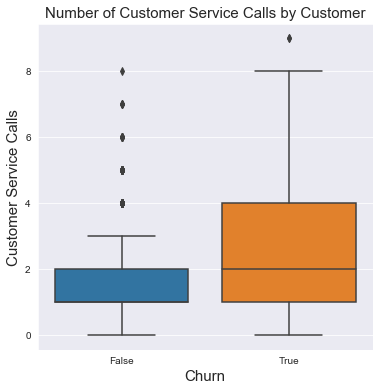

In [52]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='churn', y='customer service calls', data=df, orient='v')
plt.title('Number of Customer Service Calls by Customer', fontsize=15)
plt.ylabel('Customer Service Calls', fontsize=15)
plt.xlabel('Churn', fontsize=15)
plt.show()

[[687  22]
 [ 27  98]]


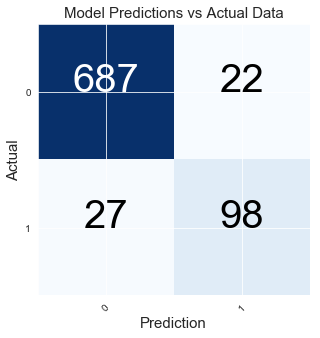

In [53]:
## easier to read confusion matrix for presentation
plt.figure(figsize=(5, 5))
xgb_cnf_matrix = confusion_matrix(y_test, y_hat_test)

print(xgb_cnf_matrix)
plt.imshow(xgb_cnf_matrix, cmap=plt.cm.Blues)

plt.title('Model Predictions vs Actual Data', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.xlabel('Prediction', fontsize=15)

class_names = set(y)
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = xgb_cnf_matrix.max()/2.

for i, j in itertools.product(range(xgb_cnf_matrix.shape[0]), range(xgb_cnf_matrix.shape[1])):
    plt.text(j, i, xgb_cnf_matrix[i, j],
             horizontalalignment='center',
             color='white' if xgb_cnf_matrix[i, j] > thresh else 'black',
             fontsize=40)

plt.show()